*Importazione Librerie*

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import scipy

# Dataset 9000+ Movies #

*Il dataset 9000+ Movies contiene un campione di fil ordinati per popolarita per Recommender Systems*

1. Importiamo il dataset:

In [2]:
mvs = pd.read_csv('mymoviedb.csv',lineterminator='\n')
mvs.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


*Otteniamo Informazione sul numero di righe e di colonne*

In [3]:
mvs.shape

(9827, 9)

*Determiniamo Tramite l'uso della describe() quali features sono quantitative:*

In [4]:
mvs.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


*Quindi le **Features Quantitative** sono 3:*
1. Popularity
2. Vote_Count
3. Vote_Avarage

*Le **Features Qualitative** sono 6:*
1. Release_Date	
2. Title	
3. Overview		
4. Original_Language	
5. Genre	
6. Poster_Url


*Verifichiamo se nel DataSet ci sono colonne con dei dati mancanti:*

In [5]:
mvs.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

**Il DataSet non ha dati Mancanti**

Visualizziamo alcune delle features, per estrapolare interessanti informazioni. Per esempio:

1. Quale era la distribuzione dei film negli anni?
2. La distribuzione dei film divisa per genere?
3. Quale e' la popolarità dei film, divisa per genere?
4. Quale e' la valutazione media dei film, divisa per genere?
5. Quale è la Distribuzione dei Vote_Count in funzione dei Vote_Average?



**1. Quale era la distribuzione dei film negli anni?**
Prima di tutto Modifichiamo il formato della data lasciando segnato solo l'anno per semplificarci la visione della distribuzione


In [6]:
release=mvs['Release_Date']
release=release.str.slice_replace(4, 10, '')
release.head()
release.describe()


count     9827
unique     102
top       2021
freq       714
Name: Release_Date, dtype: object

*Fatto ciò visualizziamo la distribuzione dei film nei vari anni:*

*Provare con scatter*

2021    714
2022    208
2020    453
1986     68
2018    530
       ... 
1943      4
1929      1
1926      2
1921      2
1930      1
Name: Release_Date, Length: 102, dtype: int64


<AxesSubplot:>

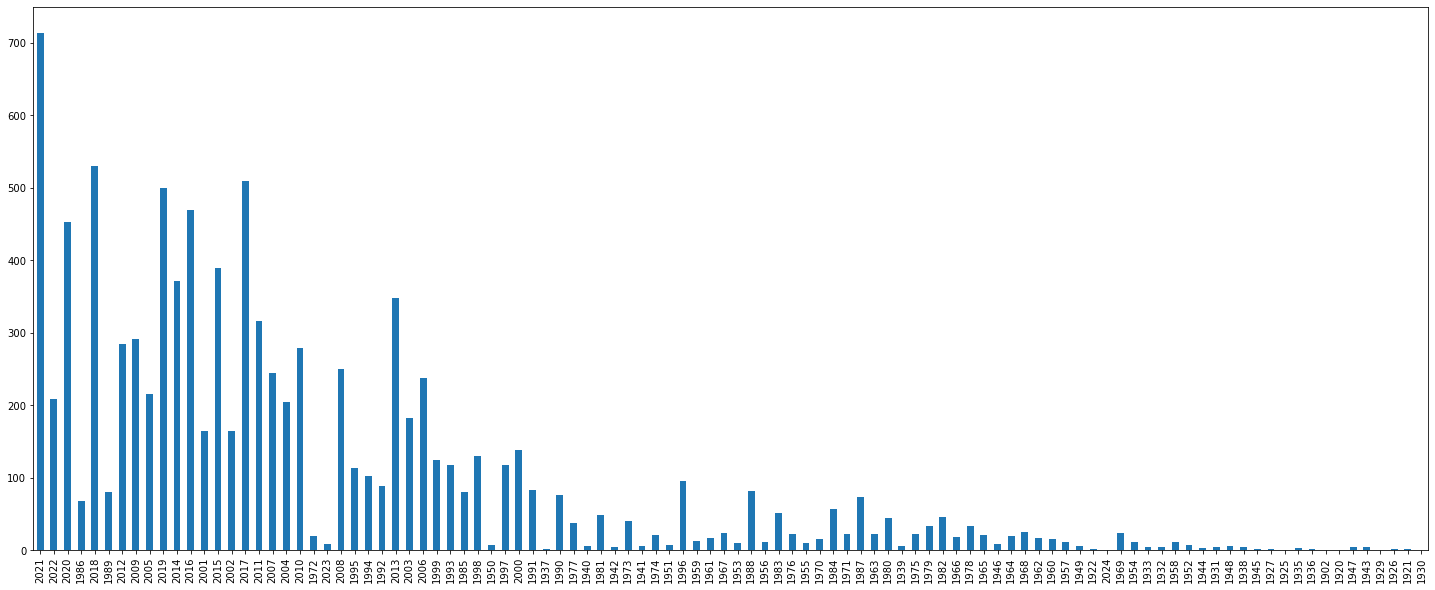

In [7]:
release=release.value_counts(normalize=False,sort=False)
print(release)
release.plot(kind = 'bar',figsize=(25,10))

**Come possiamo notare dal 1930 al 2021 c'è stato un aumento esponenziale della produzione di film**

**2. La distribuzione dei film divisa per genere?** Prima di tutto Modifichiamo il nostro DataSet per avere un solo genere per riga.

In [8]:
mvs['Genre']= mvs['Genre'].str.split(', ')
mvs= mvs.explode('Genre').reset_index(drop=True)
mvs.describe()

,Popularity,Vote_Count,Vote_Average
count,25793.000000,25793.000000,25793.000000
mean,42.001288,1504.824526,6.475749
std,113.341050,2743.009590,1.091296
min,13.354000,0.000000,0.000000
25%,16.366000,166.000000,6.000000
50%,21.865000,490.000000,6.600000
75%,36.503000,1501.000000,7.200000
max,5083.954000,31077.000000,10.000000


*Calcolo della Distribuzione:*

<AxesSubplot:>

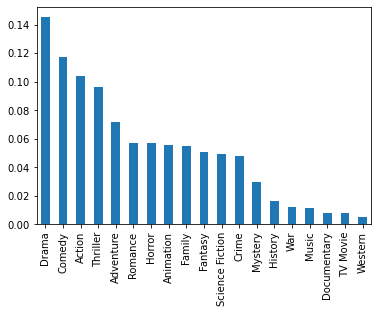

In [9]:
genere=mvs['Genre'].value_counts(normalize=True,sort=True)
genere.plot(kind = 'bar')

*Dal calcolo della distribuzione possiamo vedere che rispetto agli altri generi, i film contenenti il genere **Drama** sono di più.
Si puo ipotizzare che il genere Drama essendo quello più presente, sia anche il più piaciuto, andiamo a verificare:*

**3. Quale e' la popolarità dei film, divisa per genere?**

  Utilizzo un grafico a dispersione per visualizzare la relazione tra **popolarità e genere**

<AxesSubplot:xlabel='Genre'>

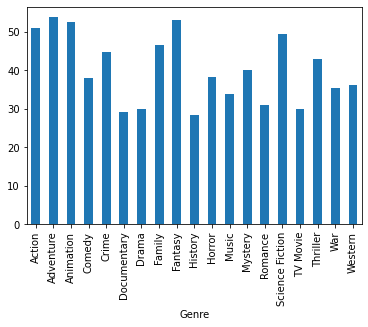

In [10]:
mvs.groupby('Genre').Popularity.mean().plot(kind='bar')

*Come Possiamo vedere i generi di Film più popolari sono **Adventure e Fantasy** e non Drama come pensavo.*


**Verifichiamo se i dati visualizzati sono corretti tramite il t-test**

In questo t-test stiamo verificando la seguente **ipotesi nulla**:
- La popolarità del genere **Adventure** è uguale alla popolarità dei restanti generi

**Ipotesi alternativa**:
- La popolarità del genere **Adventure** è diversa alla popolarità dei restanti generi


In [11]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Popularity'][mvs['Genre']=='Adventure'], popmean=mvs['Popularity'][mvs['Genre']!='Adventure'].mean(),alternative='two-sided')
print(t_statistic)
print(p_value)

3.5165113899295877
0.00044778835685399944


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.
 Infatti da quanto segue dal grafico la popolarità di Adventure è diversa dalle altre

**Testiamo le restanti ipotesi alternative**:
- La popolarità del genere **Adventure** è Maggiore alla popolarità dei restanti generi
**Ipotesi nulla**:
- La popolarità del genere **Adventure** è minore o uguale alla popolarità dei restanti generi


In [12]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Popularity'][mvs['Genre']=='Adventure'], popmean=mvs['Popularity'][mvs['Genre']!='Adventure'].mean(),alternative='greater')
print(t_statistic)
print(p_value)

3.5165113899295877
0.00022389417842699972


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.


Ci immaginiamo che i film di genere **Adventure e  Fantasy** siano quelli con la valutazione media maggiore in quanto più popolari. 
Verifichiamo questa Tesi:


**4. Quale e' la valutazione media dei film, divisa per genere?**

<AxesSubplot:xlabel='Genre'>

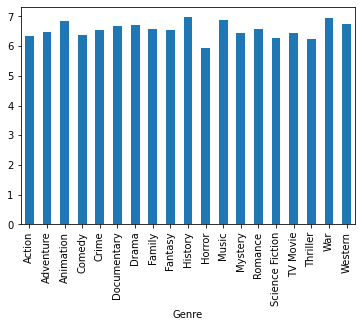

In [13]:
mvs.groupby('Genre').Vote_Average.mean().plot(kind='bar')

Al contrario di ciò che potevamo pensare i film con la valutazione media più alta sono i film di genere **History**

**Verifichiamo se i dati visualizzati sono corretti tramite il t-test**

In questo t-test stiamo verificando la seguente **ipotesi nulla**:
- La Valutazione media del genere **History** è uguale alla popolarità dei restanti generi

**Ipotesi alternativa**:
- La Valutazione media del genere **History** è diversa alla popolarità dei restanti generi

In [14]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Vote_Average'][mvs['Genre']=='History'], popmean=mvs['Vote_Average'][mvs['Genre']!='History'].mean(),alternative='two-sided')
print(t_statistic)
print(p_value)

13.480309167256372
9.602184902691854e-35


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.
 Infatti da quanto segue dal grafico si vede bene che la valutazione media di History è diversa delle altre 

**Testiamo le restanti ipotesi alternative**:
- La Valutazione media del genere **History** è Maggiore della valutazione media dei restanti generi

**Ipotesi nulla**:
- La Valutazione media del genere **History** è minore o uguale della valutazione media dei restanti generi


In [17]:
t_statistic, p_value = stats.ttest_1samp(a=mvs['Vote_Average'][mvs['Genre']=='History'], popmean=mvs['Vote_Average'][mvs['Genre']!='History'].mean(),alternative='greater')
print(t_statistic)
print(p_value)

13.480309167256372
4.801092451345927e-35


 **Il p-value e' minore della significatività, rigetto l'ipotesi nulla**, a favore di quella alternativa.
 Infatti da quanto segue dal grafico si vede bene che la valutazione media di History è maggiore delle altre 

**5. Quale è la Distribuzione dei Vote_Count in funzione dei Vote_Average?**


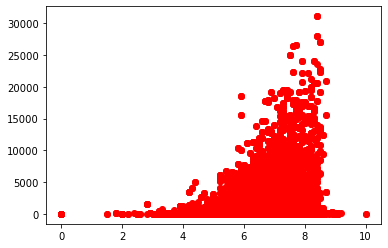

In [23]:
plt.scatter(mvs['Vote_Average'],mvs['Vote_Count'],color='r')

Ora ci chiediamo, c'e' qualche correlazione tra qualcuna delle features riportate dal dataset? 
Verifichiamolo, calcolando l'**indice di correlazione di Pearson** tra le varie features a disposizione. 

In [16]:
mvs.corr(method='pearson')

,Popularity,Vote_Count,Vote_Average
Popularity,1.000000,0.146358,0.068284
Vote_Count,0.146358,1.000000,0.248307
Vote_Average,0.068284,0.248307,1.000000


Come Possiamo vedere tra le Features la correlazione è bassissima